<a href="https://colab.research.google.com/github/mikiiiss/-news_correlation_10ac_week0/blob/task_3/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd

In [3]:
path="/content/drive/MyDrive/data set/data.csv.zip"
df= pd.read_csv(path)
df

**Data Cleaning**

In [29]:

df.dropna(subset=columns_for_missing_values, inplace=True)

In [4]:
columns_for_missing_values = ['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url_to_image', 'published_at', 'content', 'category', 'article', 'title_sentiment']

In [12]:
columns_for_duplicates = ['article_id', 'source_id', 'source_name', 'author', 'title', 'description', 'url_to_image', 'published_at', 'content', 'category', 'article', 'title_sentiment']
df.drop_duplicates(subset=columns_for_duplicates, inplace=True)

KeyError: ['column_name']

In [ ]:
df['category'].unique()

array(['Monaco', 'Madagascar', 'Mexico', 'Maldives', 'Mali', 'Barbados',
       'Nicaragua', 'Congo, The Democratic Republic of the',
       'North Macedonia', 'Malta', 'Poland', 'Myanmar',
       'Russian Federation', 'Mongolia', 'Montenegro', 'Malaysia',
       'Romania', 'Mozambique', 'Montserrat', 'South Sudan', 'News',
       'Israel', 'Mauritania', 'Mauritius', 'Netherlands', 'Martinique',
       'Malawi', 'Germany', 'Niger', 'Namibia', 'Nigeria', 'Georgia',
       'Nepal', 'Facebook', 'Norway', 'COVID', 'Peru', 'Travel',
       'History', 'Papua New Guinea', 'New Zealand', 'Sports', 'Oman',
       'Pakistan', 'Panama', 'Love', 'America', 'Philippines', 'Palau',
       'Politics', 'Armenia', 'Food', 'Sudan', 'Puerto Rico', 'Weather',
       'Real estate', 'Cars', 'Senegal', 'Singapore', 'Stock', 'Ghana',
       'TikTok', 'Photography', 'Kazakhstan', 'Games', 'Climate', 'Space',
       'Somalia', 'Tonga', 'Architecture', 'Art', 'Africa',
       'Relationships', 'Qatar', 'world', '

**Who are the top and bottom **

In [ ]:
country_to_region = {
    'Africa': ['Madagascar','Mali','South Sudan','Morocco'],
    'US': ['United States', 'USA'],
    'China': ['China'],
    'EU': ['European Union', 'Germany', 'France', 'UK'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Middle East', 'Saudi Arabia', 'Iran']
}
for region, countries in country_to_region.items():
    df[region] = df['content'].str.contains('|'.join(countries), case=False)
df
region_counts = df[list(country_to_region.keys())].sum()
region_counts

Africa          222
US             1799
China          1000
EU             2637
Russia         1312
Ukraine         868
Middle East    1035
dtype: int64

In [ ]:
pd.set_option('display.max.rows',200)


In [ ]:
 countries_with_many_articles = df['category'].value_counts().nsmallest(10)
 countries_with_many_articles

category
Martinique    2
Réunion       2
Andorra       3
Burundi       3
Cabo Verde    3
Honduras      3
San Marino    4
Gambia        4
Minimalism    4
Viet Nam      6
Name: count, dtype: int64

In [16]:
  countries_with_many_articles = df['category'].value_counts().nlargest(10)
  countries_with_many_articles


category
India        867
Finance      772
News         646
Health       639
Jobs         492
COVID        427
Education    407
Ukraine      344
Travel       344
Facebook     343
Name: count, dtype: int64

In [24]:
 countries_with_little_articles = df['category'].value_counts().nsmallest(10)
 countries_with_little_articles

category
Martinique       1
Cabo Verde       1
Mindfulness      1
Eritrea          1
Liechtenstein    1
Palau            1
Belize           1
Tajikistan       1
Vanuatu          1
Mauritania       2
Name: count, dtype: int64

In [ ]:
largest_websites = df['source_name'].value_counts().nlargest(10)
largest_websites

source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64

In [19]:
lowest_websites = df['source_name'].value_counts().nsmallest(10)
lowest_websites

source_name
The Verge              205
Wired                  252
CNN                    252
Time                   578
RT                    1086
Al Jazeera English    1587
BBC News              1939
ABC News              1946
Business Insider      1968
The Times of India    6987
Name: count, dtype: int64

In [ ]:
path="/content/drive/MyDrive/data set/traffic_data.zip"
df1=pd.read_csv(path)
df1.head(5)

In [ ]:
highest_traffic_websites = df1.nlargest(10, 'GlobalRank')
highest_traffic_websites

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
999999,1000000,485328,toyotamusicfactory.com,com,222,280,toyotamusicfactory.com,com,973201,471949,228,284
999998,999999,485327,soderhomes.com,com,222,280,soderhomes.com,com,-1,-1,-1,-1
999997,999998,485326,pinkwater.com,com,222,280,pinkwater.com,com,-1,-1,-1,-1
999996,999997,485325,mt-lock.com,com,222,280,mt-lock.com,com,952633,461429,232,284
999995,999996,485324,kireie.com,com,222,280,kireie.com,com,-1,-1,-1,-1
999994,999995,485323,keith-baker.com,com,222,280,keith-baker.com,com,973079,471891,228,287
999993,999994,485322,irishcycle.com,com,222,280,irishcycle.com,com,968062,469365,229,285
999992,999993,485321,hmag.com,com,222,280,hmag.com,com,-1,-1,-1,-1
999991,999992,485320,exploring-africa.com,com,222,280,exploring-africa.com,com,-1,-1,-1,-1
999990,999991,485319,eiretrip.com,com,222,280,eiretrip.com,com,-1,-1,-1,-1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   GlobalRank      1000000 non-null  int64 
 1   TldRank         1000000 non-null  int64 
 2   Domain          1000000 non-null  object
 3   TLD             1000000 non-null  object
 4   RefSubNets      1000000 non-null  int64 
 5   RefIPs          1000000 non-null  int64 
 6   IDN_Domain      1000000 non-null  object
 7   IDN_TLD         1000000 non-null  object
 8   PrevGlobalRank  1000000 non-null  int64 
 9   PrevTldRank     1000000 non-null  int64 
 10  PrevRefSubNets  1000000 non-null  int64 
 11  PrevRefIPs      1000000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 91.6+ MB


In [21]:
path="/content/drive/MyDrive/data set/domains_location.csv"
df2=pd.read_csv(path)
df2.head(5)

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCommonName  37802 non-null  object
 1   location          37802 non-null  object
 2   Country           37801 non-null  object
dtypes: object(3)
memory usage: 886.1+ KB


In [23]:
highest_news_media_organisations = df2['Country'].value_counts().nlargest(10)
highest_news_media_organisations

Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64

In [22]:
lowest_news_media_organisations = df2['Country'].value_counts().nsmallest(10)
lowest_news_media_organisations

Country
Oceans                                          1
Pitcairn Islands                                1
Comoros                                         1
Turks and Caicos Islands                        1
West Bank                                       1
Mayotte                                         1
South Georgia and the South Sandwich Islands    1
Greenland                                       1
Guernsey                                        1
Isle of Man                                     1
Name: count, dtype: int64

In [ ]:
df.describe()

,article_id
count,58356.000000
mean,298958.734492
std,216023.477569
min,418.000000
25%,121776.500000
50%,251651.000000
75%,451541.500000
max,781308.000000


from matplotlib import pyplot as plt
_df_0['article_id'].plot(kind='hist', bins=20, title='article_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['article_id'].plot(kind='line', figsize=(8, 4), title='article_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='article_id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16800 entries, 2 to 58349
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       16800 non-null  int64 
 1   source_id        16800 non-null  object
 2   source_name      16800 non-null  object
 3   author           16800 non-null  object
 4   title            16800 non-null  object
 5   description      16800 non-null  object
 6   url              16800 non-null  object
 7   url_to_image     16800 non-null  object
 8   published_at     16800 non-null  object
 9   content          16800 non-null  object
 10  category         16800 non-null  object
 11  article          16800 non-null  object
 12  title_sentiment  16800 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


**Modelling**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
v = TfidfVectorizer()
v.fit(df['title'])
transform_output_title = v.transform(df['title'])

In [26]:
print(v.vocabulary_)

{'amphibians': 1256, 'are': 1514, 'the': 18069, 'world': 19825, 'most': 11848, 'vulnerable': 19374, 'species': 16885, 'and': 1293, 'threats': 18141, 'increasing': 9102, 'unga': 18842, 'calls': 3149, 'for': 7316, 'humanitarian': 8824, 'truce': 18570, 'in': 9056, 'israel': 9530, 'hamas': 8250, 'war': 19437, 'how': 8784, 'countries': 4502, 'voted': 19356, 'malawi': 11011, 'heatwave': 8464, 'warning': 19456, 'issued': 9538, 'as': 1607, 'temperatures': 17970, 'set': 16084, 'to': 18260, 'soar': 16709, 'russian': 15548, 'marine': 11149, 'scientists': 15847, 'conduct': 4190, 'african': 939, 'research': 15034, 'kids': 10078, 'whose': 19665, 'insides': 9277, 'destroyed': 5306, 'return': 15161, 'of': 12604, 'drug': 5917, 'abuse': 682, 'mauritius': 11260, 'mother': 11851, 'pleads': 13602, 'help': 8499, 'over': 12898, 'missing': 11661, 'daughter': 4901, 'mumbai': 11969, 'doctors': 5706, 'remove': 14927, 'spine': 16939, 'tumour': 18609, '30': 273, 'times': 18222, 'size': 16529, 'egg': 6125, 'days': 

In [27]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

Streaming output truncated to the last 5000 lines.
resorting : 10.036046506869457
resorts : 9.342899326309512
resource : 9.630581398761292
resourcefulness : 10.036046506869457
resources : 8.426608594435358
respect : 8.426608594435358
respects : 10.036046506869457
respiratory : 7.956604965189621
respite : 9.342899326309512
respond : 8.78328353837409
responded : 9.342899326309512
responder : 10.036046506869457
responding : 8.937434218201346
responds : 8.244287037641403
response : 7.593699471500253
responses : 10.036046506869457
responsibility : 8.426608594435358
responsible : 8.021143486327192
responsibly : 10.036046506869457
rest : 8.244287037641403
restart : 8.649752145749567
restaurant : 8.531969110093183
restaurants : 8.937434218201346
restaurateur : 10.036046506869457
rested : 10.036046506869457
restive : 9.342899326309512
restless : 10.036046506869457
restlessness : 10.036046506869457
restocks : 10.036046506869457
restoration : 9.342899326309512
restore : 9.342899326309512
restored

In [28]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
df.shape

(16800, 13)

In [34]:
v = TfidfVectorizer()
v.fit(df['article'])
transform_output_article = v.transform(df['article'])

In [32]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

Streaming output truncated to the last 5000 lines.
welton : 9.630581398761292
weltweit : 9.630581398761292
weltwoche : 10.036046506869457
welwitchia : 10.036046506869457
wem : 9.630581398761292
wemba : 10.036046506869457
wembley : 7.8959803433731865
wemetirl : 10.036046506869457
wemo : 10.036046506869457
wemove : 10.036046506869457
wen : 7.173845625939989
wenatchee : 10.036046506869457
wenbin : 7.8959803433731865
wences : 10.036046506869457
wencus : 10.036046506869457
wendalyn : 10.036046506869457
wendee : 10.036046506869457
wendel : 10.036046506869457
wendell : 9.630581398761292
wendelstein : 10.036046506869457
wenders : 10.036046506869457
wendi : 9.630581398761292
wendling : 9.630581398761292
wendy : 7.510317862561202
weneedto : 10.036046506869457
wenger : 10.036046506869457
wengrow : 10.036046506869457
wenliang : 10.036046506869457
wenner : 10.036046506869457
wennesland : 9.119755774995301
wennink : 10.036046506869457
went : 3.289634378296083
wentao : 8.78328353837409
wentfurther : 

In [35]:
similarity_matrix = cosine_similarity(transform_output_title, transform_output_article)

NameError: name 'cosine_similarity' is not defined

In [37]:



# Selecting the first 100 rows and specific columns to train the model Classification of Headline
sliced_data = df.loc[:99, ['title', 'article']]
sliced_data


,title,article
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe..."
5,unga calls for humanitarian truce in israel-ha...,the resolution passed with 120 votes in favour...
6,malawi heatwave warning issued as temperatures...,malawians have been warned of an extreme heatw...
11,russian marine scientists to conduct african r...,scientists from the all-russian research insti...
16,‘kids whose insides are destroyed’: the return...,the island nation is grappling with a drug epi...
26,mother pleads for help over missing daughter,a german mother is pleading for information ab...
27,amphibians are the world's most vulnerable spe...,"the world’s frogs, salamanders, newts and othe..."
37,mumbai doctors remove spine tumour 30 times si...,mumbai: can a surgery span over a five-day per...
40,"israel tells citizens to leave egypt, jordan ‘...",national security council raises threat levels...
47,countries should build trust on maritime front...,pti defence minister rajnath singh on monday...


In [43]:
sliced_data['label_num'] = range(1, len(sliced_data) + 1)
sliced_data
sliced_data.shape

(33, 3)

In [75]:
sliced_data['headline'].value_counts()

headline
health           9
politics         7
world news       7
military         4
business         4
entertainment    2
Name: count, dtype: int64

In [61]:
sliced_data['headline'] = sliced_data['label_num'].map({
    1: "health",
    2: "politics",
    3: "health",
    4: "world news",
    5: "health",
    6: "politics",
    7: "world news",
    8: "military",
    9: "business",
    10: "politics",
    11: "entertainment",
    12: "military",
    13: "business",
    14: "world news",
    15: "health",
    16: "politics",
    17: "health",
    18: "world news",
    19: "health",
    20: "politics",
    21: "world news",
    22: "military",
    23: "business",
    24: "politics",
    25: "entertainment",
    26: "military",
    27: "business",
    28: "world news",
    29: "health",
    30: "politics",
    31: "health",
    32: "world news",
    33: "health"
})

#checking the results
sliced_data.head(5)

,title,article,label_num,headline
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe...",1,health
5,unga calls for humanitarian truce in israel-ha...,the resolution passed with 120 votes in favour...,2,politics
6,malawi heatwave warning issued as temperatures...,malawians have been warned of an extreme heatw...,3,health
11,russian marine scientists to conduct african r...,scientists from the all-russian research insti...,4,world news
16,‘kids whose insides are destroyed’: the return...,the island nation is grappling with a drug epi...,5,health


In [65]:
sliced_data['label_nums'] = sliced_data['headline'].map({
    'health' : 0,
    'politics': 1,
    'news': 2,
    'business': 3,
    'world news': 4,
    'entertainment': 5,
    'military': 6,


})
sliced_data.head(5)


,title,article,label_num,headline,label_nums
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe...",1,health,0
5,unga calls for humanitarian truce in israel-ha...,the resolution passed with 120 votes in favour...,2,politics,1
6,malawi heatwave warning issued as temperatures...,malawians have been warned of an extreme heatw...,3,health,0
11,russian marine scientists to conduct african r...,scientists from the all-russian research insti...,4,world news,4
16,‘kids whose insides are destroyed’: the return...,the island nation is grappling with a drug epi...,5,health,0


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sliced_data.title,
    sliced_data.label_nums,
    test_size=0.2,  # 20% samples will go to the test dataset
    random_state=2022,
    stratify=sliced_data.label_nums
)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (26,)
Shape of X_test:  (7,)


In [69]:
X_train.head()

65    indian high commission 'deeply saddened' by de...
77    delhi reminds male of last 5 years' shared cha...
69      why a 'hologram revolution' could be on the way
16    ‘kids whose insides are destroyed’: the return...
47    countries should build trust on maritime front...
Name: title, dtype: object

In [70]:
y_train.value_counts()

label_nums
0    7
1    6
4    5
6    3
3    3
5    2
Name: count, dtype: int64

In [71]:
y_test.value_counts()

label_nums
4    2
0    2
3    1
6    1
1    1
Name: count, dtype: int64

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.07      0.20      0.10         7
weighted avg       0.10      0.29      0.14         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
X_test[:5]

40    israel tells citizens to leave egypt, jordan ‘...
49    ‘music to beijing’s ears’: has china won the m...
87         xi congratulates muizzu, vows to deepen ties
98         parineeti drops new pic from her girl's trip
2     amphibians are the world’s most vulnerable spe...
Name: title, dtype: object

In [74]:
y_test[:5]

40    3
49    6
87    1
98    4
2     0
Name: label_nums, dtype: int64

In [77]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.10      0.20      0.13         7
weighted avg       0.14      0.29      0.19         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 2, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Text(95.72222222222221, 0.5, 'Truth')

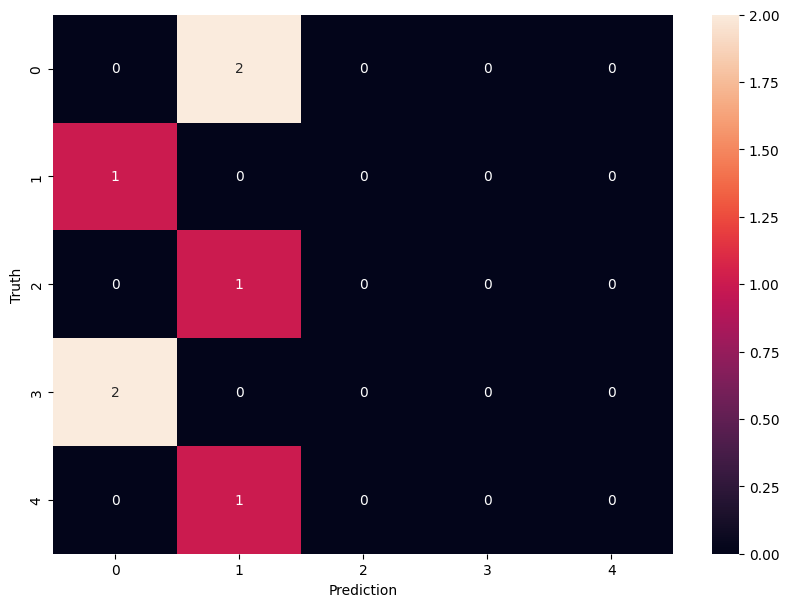

In [88]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [78]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [80]:
sliced_data['preprocessed_txt'] = sliced_data['title'].apply(preprocess)
sliced_data.head()

,title,article,label_num,headline,label_nums,preprocessed_txt
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe...",1,health,0,amphibian world vulnerable specie threat increase
5,unga calls for humanitarian truce in israel-ha...,the resolution passed with 120 votes in favour...,2,politics,1,unga call humanitarian truce israel hamas war ...
6,malawi heatwave warning issued as temperatures...,malawians have been warned of an extreme heatw...,3,health,0,malawi heatwave warning issue temperature set ...
11,russian marine scientists to conduct african r...,scientists from the all-russian research insti...,4,world news,4,russian marine scientist conduct african research
16,‘kids whose insides are destroyed’: the return...,the island nation is grappling with a drug epi...,5,health,0,kid inside destroy return drug abuse mauritius


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    sliced_data.preprocessed_txt,
    sliced_data.label_nums,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=sliced_data.label_nums
)

In [82]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.14         7
   macro avg       0.03      0.10      0.05         7
weighted avg       0.05      0.14      0.07         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
